# **Project Part B**


This is the requirement of Data Science process components for Project Part B consists of Questions, Data collection, Data pre-processing,
EDA and Data visualization

## **C4 - Group Members**
 
1. Tala Maan Altaifi 1191302030
2. Nur Adlina Marini Binti Amir Suharman 1181100317
3. Nadia Ahmad Pirdaus 1171103742

### **Data Collection**






Given the data from FinCEN:

[Source: https://www.icij.org/investigations/fincen-files/download-fincen-files-transaction-data/ ]

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

#pd.options.display.float_format = "{:.2f}".format

In [19]:
from google.colab import drive
drive.mount ('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [20]:
# To read CSV file data from FinCEN
df = pd.read_csv('/content/drive/Shareddrives/IDS Assignment /Project Part B/download_transactions_map.csv')
df

,id,icij_sar_id,filer_org_name_id,filer_org_name,begin_date,end_date,originator_bank_id,originator_bank,originator_bank_country,originator_iso,beneficiary_bank_id,beneficiary_bank,beneficiary_bank_country,beneficiary_iso,number_transactions,amount_transactions
0,223254,3297,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Mar 25, 2015","Sep 25, 2015",cimb-bank-berhad,CIMB Bank Berhad,Singapore,SGP,barclays-bank-plc-london-england-gbr,Barclays Bank Plc,United Kingdom,GBR,68.0,5.689852e+07
1,223255,3297,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Mar 30, 2015","Sep 25, 2015",cimb-bank-berhad,CIMB Bank Berhad,Singapore,SGP,barclays-bank-plc-london-england-gbr,Barclays Bank Plc,United Kingdom,GBR,118.0,1.162384e+08
2,223258,2924,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Jul 5, 2012","Jul 5, 2012",barclays-bank-plc-ho-uk,Barclays Bank Plc Ho UK,United Kingdom,GBR,skandinaviska-enskilda-banken-stockholm-sweden...,Skandinaviska Enskilda Banken,Sweden,SWE,NaN,5.000000e+03
3,223259,2924,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"Jun 20, 2012","Jun 20, 2012",barclays-bank-plc-ho-uk,Barclays Bank Plc Ho UK,United Kingdom,GBR,skandinaviska-enskilda-banken-stockholm-sweden...,Skandinaviska Enskilda Banken,Sweden,SWE,NaN,9.990000e+03
4,223260,2924,the-bank-of-new-york-mellon-corp,The Bank of New York Mellon Corp.,"May 31, 2012","May 31, 2012",barclays-bank-plc-ho-uk,Barclays Bank Plc Ho UK,United Kingdom,GBR,skandinaviska-enskilda-banken-stockholm-sweden...,Skandinaviska Enskilda Banken,Sweden,SWE,NaN,1.200000e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4502,243956,2804,deutsche-bank-ag,Deutsche Bank AG,"Aug 22, 2016","Aug 22, 2016",ing-netherland-nv,ING Netherland NV,Netherlands,NLD,rigenesis-bank-as-latvia-lva,Rigenesis Bank AS,Latvia,LVA,1.0,2.041555e+07
4503,243957,2804,deutsche-bank-ag,Deutsche Bank AG,"Aug 16, 2016","Aug 16, 2016",rigenesis-bank-as,Rigenesis Bank AS,Latvia,LVA,ing-netherland-nv-netherlands-nld,ING Netherland NV,Netherlands,NLD,1.0,2.300000e+07
4504,243958,2804,deutsche-bank-ag,Deutsche Bank AG,"Aug 16, 2016","Aug 16, 2016",ing-netherland-nv,ING Netherland NV,Netherlands,NLD,rigenesis-bank-as-latvia-lva,Rigenesis Bank AS,Latvia,LVA,1.0,2.341600e+07
4505,243959,2804,deutsche-bank-ag,Deutsche Bank AG,"Jun 14, 2016","Jun 14, 2016",rigenesis-bank-as,Rigenesis Bank AS,Latvia,LVA,ing-netherland-nv-netherlands-nld,ING Netherland NV,Netherlands,NLD,1.0,3.325894e+07


## **Data Preprocessing / Cleaning**


In [21]:
### DATA CLEANING ###
# 1. drop row if begin_date and end_date is NaN
# 2. drop the rows where number_transactions contains NaN values & amount_transactions > 10000
# 3. update number_transactions to 1, when amount_transactions < 10000

# 1.
df_clean1 = df.dropna(subset = ['begin_date', 'end_date'])

# creae dataframe to take only rows with NaN values
is_NaN = df_clean1.isnull()
row_has_NaN = is_NaN.any(axis='columns')
df_num_trans_NaN = df_clean1[row_has_NaN]

# 2. filter amount_transactions > 1000 & number_transactions is Nan values, then drop the rows
df_thres = df_num_trans_NaN[df_num_trans_NaN['amount_transactions'] > 10000]    
df_clean2 = pd.concat([df_clean1, df_thres]).drop_duplicates(keep=False)

# 3. update the number_transactions NaN values with 1 
df_cleaned = df_clean2.fillna(1)
df_cleaned.isnull().sum()
#df_cleaned.count()
#df_cleaned

id                          0
icij_sar_id                 0
filer_org_name_id           0
filer_org_name              0
begin_date                  0
end_date                    0
originator_bank_id          0
originator_bank             0
originator_bank_country     0
originator_iso              0
beneficiary_bank_id         0
beneficiary_bank            0
beneficiary_bank_country    0
beneficiary_iso             0
number_transactions         0
amount_transactions         0
dtype: int64

# **Questions, EDA and Data Visualization**

### **Problem 1 - Trends in suspicious behaviour when it comes to money transactions**

#### **Question 1**

How many SARs were filed each year during the period of reporting?


,Number of SARs Reported
Year,
2000,9
2001,1
2002,3
2004,3
2005,3
2006,3
2007,91
2008,197
2009,186


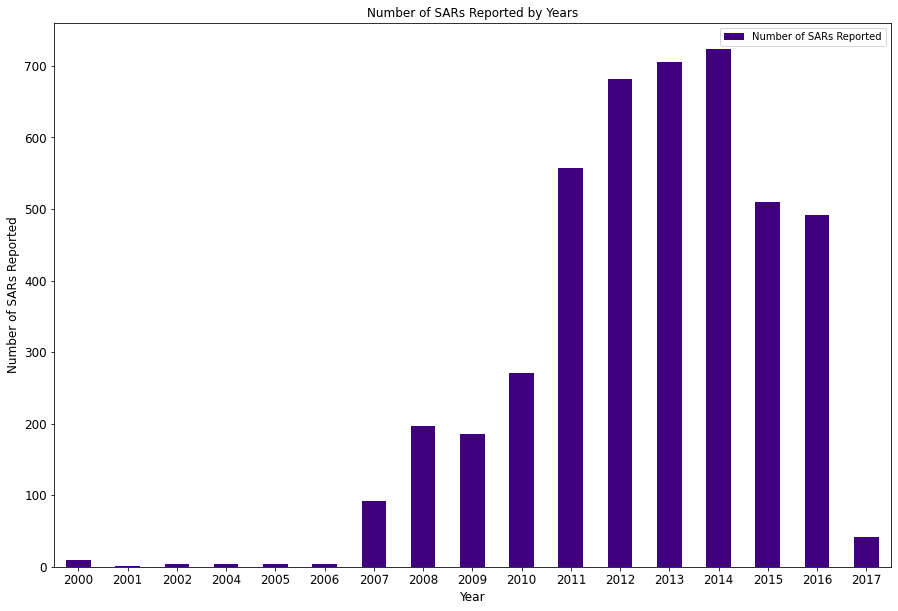

In [22]:
# To change the data type of "begin_date" from object to datetime64[ns]:
df_cleaned["begin_date"] = pd.to_datetime(df_cleaned["begin_date"])

# Store "begin_date" & "id" column in 2 seperate dataframes, then combine them both:
df_year = pd.DataFrame(df_cleaned["begin_date"].dt.year).rename(columns = {"begin_date": "Year"}) 
df_id = pd.DataFrame(df["id"]).rename(columns = {"id": "Number of SARs Reported"})  
df_id_year = pd.concat([df_id, df_year], axis = 1, join = "inner")

# Display the number of SARs reported each year in a dataframe:
#df_id_year.groupby('Year').count().sum()   
df_sar = df_id_year.groupby('Year').count() 
display(df_sar)

# Plotting a bar graph to observe the trend
sar_bar_plot = df_sar.plot(kind = 'bar', title = "Number of SARs Reported by Years", figsize = (15, 10), cmap = 'Purples_r', rot = 0.5, fontsize = 12)
sar_bar_plot.set_xlabel("Year", fontsize = 12)
sar_bar_plot.set_ylabel("Number of SARs Reported", fontsize = 12)
plt.show()

by using the df_cleaned, our total number of SARs is now 4477

#### **Question 2**
How many reports have been filed where one transaction transferred $10,000 or more?


In [23]:
# Filter into 'number_transactions' == 1 & 'amount_transactions' >= 10000
loc_threshold = df_cleaned.loc[(df_cleaned['number_transactions'] == 1) & (df_cleaned['amount_transactions'] >= 10000)]

# Save results into a dataframe
df_threshold = loc_threshold[['id', 'originator_bank', 'originator_bank_country', 'beneficiary_bank', 'beneficiary_bank_country', 'number_transactions', 'amount_transactions']]
#print(df_threshold.count())   # Tala (just checking purposes)
display(df_threshold)

# Number of reports where 1 transaction transfered $10,000 or more
print("\nNumber of reports where 1 transaction transfered $10,000 or more:", df_threshold['id'].count(), "reported files")

,id,originator_bank,originator_bank_country,beneficiary_bank,beneficiary_bank_country,number_transactions,amount_transactions
94,223350,Barclays Bank Plc Ho UK,United Kingdom,Skandinaviska Enskilda Banken,Sweden,1.0,34644.35
95,223351,Barclays Bank Plc Ho UK,United Kingdom,Skandinaviska Enskilda Banken,Sweden,1.0,40000.00
96,223352,Barclays Bank Plc Ho UK,United Kingdom,Skandinaviska Enskilda Banken,Sweden,1.0,36855.87
98,223354,Natwest Offshore,Gibraltar,DNB Nor Bank Asa,Norway,1.0,70000.00
100,223356,Natwest Offshore,Gibraltar,DNB Nor Bank Asa,Norway,1.0,16510.00
...,...,...,...,...,...,...,...
4502,243956,ING Netherland NV,Netherlands,Rigenesis Bank AS,Latvia,1.0,20415554.55
4503,243957,Rigenesis Bank AS,Latvia,ING Netherland NV,Netherlands,1.0,23000000.00
4504,243958,ING Netherland NV,Netherlands,Rigenesis Bank AS,Latvia,1.0,23416000.00
4505,243959,Rigenesis Bank AS,Latvia,ING Netherland NV,Netherlands,1.0,33258935.96



Number of reports where 1 transaction transfered $10,000 or more: 2230 reported files


#### **Question 3**
What is the frequency of transactions that were made within a certain period of time?


In [7]:
# Congo
# change end_date to datetime type (begin_date already done in q1)
df_cleaned["end_date"] = pd.to_datetime(df_cleaned["end_date"])

# 1. check begin date == end date
df_locccc1 = df_cleaned.loc[(df_cleaned["begin_date"] == df_cleaned["end_date"])]

# 2. amount transaction (money) < 10k
df_locccc2 = df_locccc1.loc[(df_locccc1["amount_transactions"] < 10000)]

# 3. filter into origin_bank_country => congo, bank => Trust Merchant Bank Sarl
df_locccc3 = df_locccc2.loc[(df_locccc2['originator_bank_country'] == 'Congo') & (df_locccc2['originator_bank'] == 'Trust Merchant Bank Sarl')]

df_locccc = df_locccc3[['originator_bank', 'originator_bank_country', 'beneficiary_bank', 'beneficiary_bank_country', 'begin_date', 'end_date', 'number_transactions', 'amount_transactions']]
df_locccc.count().sum()
#df_locccc
#df_locccc['number_transactions'].count().sum()

376

#### **Question 4**
What is the correlation between the total number of suspicious transactions and the years it had occurred in?


,Number of Transactions
Year,
2000,9.0
2001,1.0
2002,3.0
2004,177.0
2005,39.0
2006,29.0
2007,646.0
2008,752.0
2009,354.0


''

,Year,Number of Transactions
Year,1.000000,0.030432
Number of Transactions,0.030432,1.000000


''

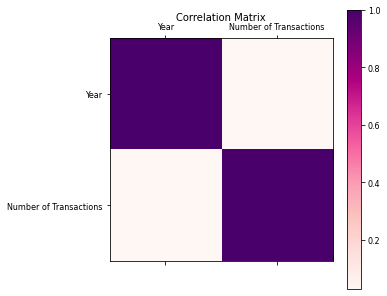

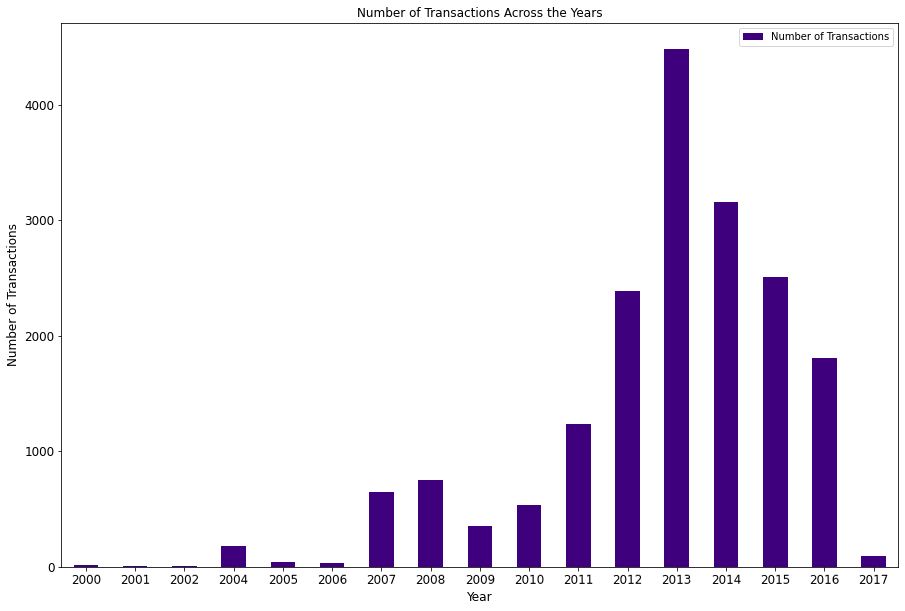

In [24]:
# 1. store "number_transactions" in a seperate dataframe, then join it with the 'year' dataframe created previously   
sus_trans = pd.DataFrame(df_cleaned["number_transactions"]).rename(columns = {"number_transactions": "Number of Transactions"})  

sus_trans_year = pd.concat([df_year, sus_trans], axis = 1, join = "inner")
sum_sus_trans_year = sus_trans_year.groupby('Year').agg(np.sum)

# 2. Displays the total transactions that were carried out by year
display(sum_sus_trans_year)

# 3. Actual value of correlation
display('', sus_trans_year.corr(), '')

# 4. Graphing a correlation matrix to determine whether or not there is a correlation between the 2 variables
f = plt.figure(figsize = (5, 5))
plt.matshow(sus_trans_year.corr(), fignum = f.number, cmap = 'RdPu')
plt.xticks(range(sus_trans_year.select_dtypes(['number']).shape[1]), sus_trans_year.select_dtypes(['number']).columns, fontsize = 8)
plt.yticks(range(sus_trans_year.select_dtypes(['number']).shape[1]), sus_trans_year.select_dtypes(['number']).columns, fontsize = 8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 8)
plt.title('Correlation Matrix', fontsize = 10);
plt.show()
print('')

# 5. Plotting a bar graph to observe the trend
bar_plot = sum_sus_trans_year.plot(kind = 'bar', title = "Number of Transactions Across the Years", figsize = (15, 10), cmap = 'Purples_r', rot = 0.5, fontsize = 12)
bar_plot.set_xlabel("Year", fontsize = 12)
bar_plot.set_ylabel("Number of Transactions", fontsize = 12)
plt.show()

notes: <br>
- by referring to the correlation matrix, there is NO correlation between years and num. of transacs, cuz 0.02 is close to 0 (can plot a scatter plot if we wanna be EXTRA sure) <br>
- peak of transactions occurred in the year 2013 (why? what happened in dis year? economical boom?) <br>
-sudden spike in 2004 compared to 2002<br>
-starting 2007 numbers kept slightly increasing<br>
-2011~2015/2016 highlight of the years


In [25]:
#### Data Mining ####
#min-max normalization
df_sar['Number of SARs Reported'] = (df_sar['Number of SARs Reported'] - df_sar['Number of SARs Reported'].min()) / (df_sar['Number of SARs Reported'].max() - df_sar['Number of SARs Reported'].min())
display(df_sar)

sum_sus_trans_year['Number of Transactions'] = (sum_sus_trans_year['Number of Transactions'] - sum_sus_trans_year['Number of Transactions'].min()) / (sum_sus_trans_year['Number of Transactions'].max() - sum_sus_trans_year['Number of Transactions'].min())
display(sum_sus_trans_year)

,Number of SARs Reported
Year,
2000,0.011065
2001,0.000000
2002,0.002766
2004,0.002766
2005,0.002766
2006,0.002766
2007,0.124481
2008,0.271093
2009,0.255878


,Number of Transactions
Year,
2000,0.001785
2001,0.000000
2002,0.000446
2004,0.039259
2005,0.008476
2006,0.006246
2007,0.143877
2008,0.167522
2009,0.078742


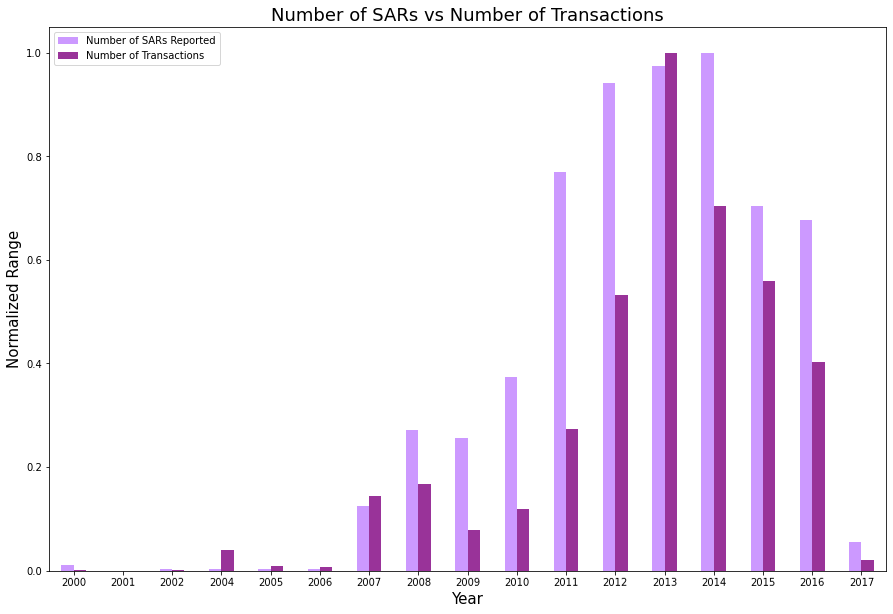

In [26]:
data = {'Year':  [2000, 2001, 2002, 2004, 2005, 2006, 2007, 2008, 2009,
                  2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
        'Number of SARs Reported': [0.011065, 0.000000, 0.002766, 0.002766, 0.002766, 0.002766, 0.124481,
                                    0.271093, 0.255878, 0.373444, 0.769018, 0.941909, 0.973721, 1.000000,
                                    0.704011, 0.677732, 0.055325],
        'Number of Transactions' : [0.001785, 0.000000, 0.000446, 0.039259, 0.008476, 0.006246, 0.143877, 
                                    0.167522, 0.078742, 0.118671, 0.274370, 0.532010, 1.000000, 0.703993,
                                    0.558778, 0.401963, 0.020299]
        }

df_test = pd.DataFrame(data)
df_test = df_test.set_index('Year')
df_test

#comparison multiple bar graph between SARs & Transactions
ax = df_test.plot(kind = 'bar', figsize = (15, 10), color = ['#CC99FF','#993399'], rot = 0.5)
plt.title("Number of SARs vs Number of Transactions", fontsize = 18)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Normalized Range", fontsize = 15)
plt.legend(loc = 'upper left')
plt.show()

### **Problem 2 - The overall behaviour of bank transactions across all countries**


#### **Question 1**
Which top 10 countries sent the most money?


In [28]:
sent = df_cleaned[['originator_bank_country', 'amount_transactions']]
sent.rename(columns = {"originator_bank_country": "Originator Country", "amount_transactions": "Amount Transferred"}, inplace = True)

top_sent = sent.groupby('Originator Country').agg(np.sum).sort_values('Amount Transferred', ascending = False).head(10)
top_sent

,Amount Transferred
Originator Country,
Latvia,6.381732e+09
Netherlands,4.968203e+09
Switzerland,4.177792e+09
United Kingdom,3.559200e+09
Russia,3.500971e+09
Singapore,1.244935e+09
United States,1.189008e+09
Cayman Islands,1.020049e+09
Hong Kong,9.524613e+08


#### **Question 2**
Which top 10 countries received the most money?


In [29]:
received = df_cleaned[['beneficiary_bank_country','amount_transactions']]
received.rename(columns = {"beneficiary_bank_country": "Beneficiary Country", "amount_transactions": "Amount Received"}, inplace = True)

top_received = received.groupby('Beneficiary Country').agg(np.sum).sort_values('Amount Received', ascending = False).head(10)
top_received

,Amount Received
Beneficiary Country,
Russia,7.275339e+09
Latvia,3.947781e+09
Switzerland,3.740820e+09
Hong Kong,2.654767e+09
United Kingdom,2.308516e+09
Singapore,2.266139e+09
United States,1.823797e+09
Netherlands,1.755134e+09
Cayman Islands,1.052322e+09


#### **Question 3**
What are the top banks from the top 3 countries that has sent the most money throughout the years?


In [30]:
worst_1 = df_cleaned.loc[df_cleaned['originator_bank_country']=='Russia']
worst_2 = df_cleaned.loc[df_cleaned['originator_bank_country']=='Latvia']
worst_3 = df_cleaned.loc[df_cleaned['originator_bank_country']=='Switzerland']

worst_1 = worst_1[['originator_bank','begin_date','amount_transactions']]
worst_2 = worst_2[['originator_bank','begin_date','amount_transactions']]
worst_3 = worst_3[['originator_bank','begin_date','amount_transactions']]
# display(worst_1.head(10))
# display(worst_2.head(10))
# display(worst_3.head(10))

# now that the dataframes are separated by each country, how to find which is the top bank for each dataframe
#Russia
w1_top3 = worst_1.set_index('originator_bank').groupby('originator_bank')
df_Russia = pd.DataFrame(w1_top3.agg(np.sum).sort_values('amount_transactions', ascending = False).head(3))
display(df_Russia)

#Latvia
w2_top3 = worst_2.set_index('originator_bank').groupby('originator_bank')
df_Latvia = pd.DataFrame(w2_top3.agg(np.sum).sort_values('amount_transactions', ascending = False).head(3))
display(df_Latvia)

#Switzerland
w3_top3 = worst_3.set_index('originator_bank').groupby('originator_bank')
df_Switz = pd.DataFrame(w3_top3.agg(np.sum).sort_values('amount_transactions', ascending = False).head(3))
display(df_Switz)

,amount_transactions
originator_bank,
Rosbank,1.207456e+09
Alfa Bank,2.966083e+08
Primorye Bank,2.055253e+08


,amount_transactions
originator_bank,
AS Expobank,2.666430e+09
Rigensis Bank AS,1.311974e+09
Norvik Banka JSC,7.582468e+08


,amount_transactions
originator_bank,
Gazprombank,8.814242e+08
Societe Generale Private Banking,7.600415e+08
Bank Julius Baer And Co. Ltd.,3.795185e+08


#### **Question 4**
What are the patterns that these banks exhibit when it comes to the total amount of suspicious transactions on a yearly basis?


In [32]:
# 1. plot using one graph. Type: multiple line graph. It will have 3 lines (each line is a diff. color representing one bank by each country)
#    x-axis: year , y-axis: amount of money

# Rosbank of Russia
rosbank_loc = df_cleaned.loc[(df_cleaned['originator_bank'] == 'Rosbank')]
rosbank_loc = rosbank_loc[['begin_date', 'amount_transactions']]
rosbank_year = pd.DataFrame(rosbank_loc["begin_date"].dt.year).rename(columns = {"begin_date": "Year"}, inplace = False)
rosbank_trans = pd.DataFrame(rosbank_loc["amount_transactions"]).rename(columns = {"amount_transactions": "Amount of Transactions"}, inplace = False)  
df_Rosbank = pd.concat([rosbank_trans, rosbank_year], axis = 1, join = "inner")
df_Rosbank = df_Rosbank.groupby('Year').sum()

# AS Expobank of Latvia
AS_loc = df_cleaned.loc[(df_cleaned['originator_bank'] == 'AS Expobank')]
AS_loc = AS_loc[['begin_date', 'amount_transactions']]
AS_year = pd.DataFrame(AS_loc["begin_date"].dt.year).rename(columns = {"begin_date": "Year"}, inplace = False)
AS_trans = pd.DataFrame(AS_loc["amount_transactions"]).rename(columns = {"amount_transactions": "Amount of Transactions"}, inplace = False)  
df_AS = pd.concat([AS_trans, AS_year], axis = 1, join = "inner")
df_AS = df_AS.groupby('Year').sum()

# Gazprombank of Switzerland
gaz_loc = df_cleaned.loc[(df_cleaned['originator_bank'] == 'Gazprombank')]
gaz_loc = gaz_loc[['begin_date', 'amount_transactions']]
gaz_year = pd.DataFrame(gaz_loc["begin_date"].dt.year).rename(columns = {"begin_date": "Year"}, inplace = False)
gaz_trans = pd.DataFrame(gaz_loc["amount_transactions"]).rename(columns = {"amount_transactions": "Amount of Transactions"}, inplace = False)  
df_gaz = pd.concat([gaz_trans, gaz_year], axis = 1, join = "inner")
df_gaz = df_gaz.groupby('Year').sum()

# Displaying dataframes
print("Rosbank of Russia")
display(df_Rosbank)
print("\n\nAS Expobank of Latvia")
display(df_AS)
print("\n\nGazprombank of Switzerland")
display(df_gaz)
print("\n\n")

Rosbank of Russia


,Amount of Transactions
Year,
2007,7.311599e+05
2008,4.315354e+07
2010,1.143066e+08
2011,2.630180e+08
2012,1.873805e+08
2013,1.400000e+08
2014,4.128631e+08
2016,9.840000e+06
2017,3.616266e+07




AS Expobank of Latvia


,Amount of Transactions
Year,
2012,1.755000e+07
2013,2.225152e+09
2014,1.946323e+08
2015,2.119498e+08
2016,1.714648e+07




Gazprombank of Switzerland


,Amount of Transactions
Year,
2007,1.172816e+06
2010,7.628817e+07
2011,5.288370e+06
2013,8.125560e+08
2014,2.111456e+07
2015,5.000000e+06
2016,3.000000e+06
2017,2.480000e+06


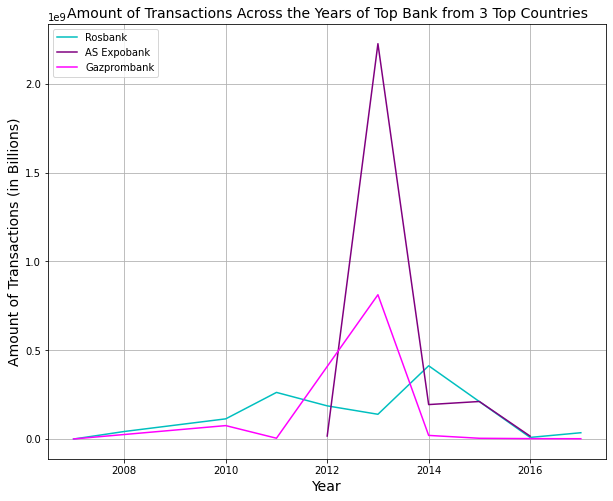

In [33]:
# Plotting a multiple lines graph to observe the pattern between these 3 banks
r_year = [2007, 2008, 2010, 2011, 2012, 2013, 2014, 2016, 2017]    ## Rosbank
AS_year = [2012, 2013, 2014, 2015, 2016]                           ## AS Expobank
g_year = [2007, 2010, 2011, 2013, 2014, 2015, 2016, 2017]          ## Gazprombank

# Multiple lines graph - to observe the pattern between these 3 banks
fig = plt.figure(figsize=(10,8))
plt.plot(r_year, df_Rosbank['Amount of Transactions'], color = 'c')
plt.plot(AS_year, df_AS['Amount of Transactions'], color = 'purple')
plt.plot(g_year, df_gaz['Amount of Transactions'], color = 'magenta')
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Amount of Transactions (in Billions)', fontsize = 14)
plt.title('Amount of Transactions Across the Years of Top Bank from 3 Top Countries', fontsize = 14)
plt.legend(['Rosbank', 'AS Expobank', 'Gazprombank'], loc = 'upper left')
plt.grid(True)
plt.show()